# **IDS 561: Homework 4**
Son Nguyen

Sean O'Reilly

CJ All

# INSTALL DEPENDENCIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jre-headless_8u282-b08-0ubuntu1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.152 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jdk-headless_8u282-b08-0ubuntu1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.152 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?


# GET SPARK INSTALLER


In [ ]:
!wget -q http://apache.mirrors.pair.com/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz

In [ ]:
!ls

sample_data  spark-2.4.7-bin-hadoop2.7.tgz


In [ ]:
!tar -xvf spark-2.4.7-bin-hadoop2.7.tgz

spark-2.4.7-bin-hadoop2.7/
spark-2.4.7-bin-hadoop2.7/kubernetes/
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-2.4.7-bin-hadoop2.7/NOTICE
spark-2.4.7-bin-hadoop2.7/data/
spark-2.4.7-bin-hadoop2.7/data/strea

In [ ]:
!ls 

sample_data  spark-2.4.7-bin-hadoop2.7	spark-2.4.7-bin-hadoop2.7.tgz


In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

Exception: ignored

In [ ]:
from pyspark import SparkContext
sc =SparkContext.getOrCreate()

# READ THE DATASET

In [ ]:
from urllib.request import urlretrieve
import pandas as pd

In [ ]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [ ]:
urlretrieve(iris)

('/tmp/tmp4wi2nthb', <http.client.HTTPMessage at 0x7f05f44c9050>)

In [ ]:
df = pd.read_csv(iris, sep=',', header=None)

In [ ]:
df

DataFrame[sepal.length: double, sepal.width: double, petal.length: double, petal.width: double, variety: string]

In [ ]:
from io import StringIO

In [ ]:
df = spark.read.format('com.databricks.spark.csv').\
                       options(header='true', \
                       inferschema='true').\
            load("/content/drive/MyDrive/IDS 561/hw4/iris.csv",header=True);

In [ ]:
df.show(5,True)

+------------+-----------+------------+-----------+-------+
|sepal.length|sepal.width|petal.length|petal.width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [ ]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal.length|        sepal.width|      petal.length|       petal.width|  variety|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335|  3.057333333333334|3.7580000000000027| 1.199333333333334|     null|
| stddev|0.8280661279778637|0.43586628493669793|1.7652982332594662|0.7622376689603467|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   Setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Virginica|
+-------+------------------+-------------------+------------------+------------------+---------+



In [ ]:
df.columns

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [ ]:
df2 = df.withColumnRenamed("sepal.length","sepallength")\
.withColumnRenamed("sepal.width","sepalwidth")\
.withColumnRenamed("petal.length","petallength")\
.withColumnRenamed("petal.width","petalwidth")

In [ ]:
from pyspark.ml.feature import VectorAssembler

features = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth') 

In [ ]:
from pyspark.sql.types import StructType, StructField, NumericType

In [ ]:
assembler = VectorAssembler(inputCols=features,outputCol="features")

In [ ]:
dataset=assembler.transform(df2)

In [ ]:
dataset.select("features").show(truncate=False)

+-----------------+
|features         |
+-----------------+
|[5.1,3.5,1.4,0.2]|
|[4.9,3.0,1.4,0.2]|
|[4.7,3.2,1.3,0.2]|
|[4.6,3.1,1.5,0.2]|
|[5.0,3.6,1.4,0.2]|
|[5.4,3.9,1.7,0.4]|
|[4.6,3.4,1.4,0.3]|
|[5.0,3.4,1.5,0.2]|
|[4.4,2.9,1.4,0.2]|
|[4.9,3.1,1.5,0.1]|
|[5.4,3.7,1.5,0.2]|
|[4.8,3.4,1.6,0.2]|
|[4.8,3.0,1.4,0.1]|
|[4.3,3.0,1.1,0.1]|
|[5.8,4.0,1.2,0.2]|
|[5.7,4.4,1.5,0.4]|
|[5.4,3.9,1.3,0.4]|
|[5.1,3.5,1.4,0.3]|
|[5.7,3.8,1.7,0.3]|
|[5.1,3.8,1.5,0.3]|
+-----------------+
only showing top 20 rows



In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.clustering import KMeans

# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))


# Evaluate clustering.
cost = model.computeCost(dataset)
print("Within Set Sum of Squared Errors = " + str(cost))

# Shows the result.
print("Cluster Centers: ")
ctr=[]
centers = model.clusterCenters()
for center in centers:
    ctr.append(center)
    print(center)

Silhouette with squared euclidean distance = 0.850351222925146
Within Set Sum of Squared Errors = 152.34795176035908
Cluster Centers: 
[6.30103093 2.88659794 4.95876289 1.69587629]
[5.00566038 3.36981132 1.56037736 0.29056604]


In [ ]:
import numpy as np
cost = np.zeros(20)
sil = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans()\
            .setK(k)\
            .setSeed(1)

    model = kmeans.fit(dataset)
    predictions = model.transform(dataset)
    evaluator = ClusteringEvaluator()
    sil[k] = evaluator.evaluate(predictions)
    cost[k] = model.computeCost(dataset) # requires Spark 2.0 or later

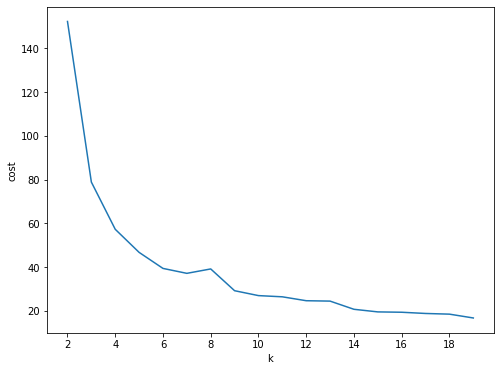

In [ ]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
sil

array([0.        , 0.        , 0.85035122, 0.73441306, 0.67225373,
       0.67086938, 0.54792778, 0.53699759, 0.60121844, 0.45723007,
       0.52152424, 0.49995249, 0.46927975, 0.45088299, 0.45675536,
       0.47291243, 0.4569336 , 0.38212288, 0.42192588, 0.40377929])

“k=6 gives the best performance, Silhouette =0.54792778 "


Reference
https://runawayhorse001.github.io/LearningApacheSpark/clustering.html
https://spark.apache.org/docs/latest/ml-clustering.html
https://spark.apache.org/docs/2.0.1/ml-classification-regression.html
https://www.bmc.com/blogs/python-spark-k-means-example/